# Algoritmo basado en "Bollinger Bands M.R."
Ing. Carlos Crespo Elizondo, MSF<br>
MF-013 Análisis de Inversión<br>
Clase del 16 de noviembre 2021<br>
<br>
Maestría de Finanzas, Facultad de Economía<br>
UANL<br>

## Sobre las Bandas de Bollinger

La técnica fue desarrollada por John Bollinger.  Y consiste en colocar una banda superior y una ineferior alrededor de un promedio móvil.  Por lo general el promedio móvil de las Bandas de Bollinger, tiene una ventana de 20 días.  La distancia entre las bandas y el promedio móvil son dos desviaciones estándar o  $\pm2 \sigma$.  Al utilizar $\pm2 \sigma$ nos aseguramos que el 95% de los datos de los precios están entre las dos bandas.  Se concidera que el precio de la acción está sobrevaluado, cuando toca la banda $+2\sigma$ (superior) y subvaluado cuando toca la banda $-2\sigma$ (inferior).

## Estrategia básica de las Bandas de Bollinger

La estrategia más básica es comprar cuando el mercado está subvaluado y vender cuando está sobrevaluado.  En otras palabras, comprar cuando el precio de cierre toca la banda inferior $-2\sigma$ y vender cuando toca la banda superior $+2\sigma$.

## Codificar estrategia básica de Bollinger Bands de AC en Python

### Importar librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import herramientas_financieras as mf

from pylab import plt
plt.style.use('seaborn')

### Recordar lista de emisoras

<table>
    <tr>
      <th><center></center></th>
      <th><center></center></th>
      <th><center></center></th>
      <th><center></center></th>
  </tr>
    
  <tr>
    <td style="text-align:center;">ac</td>
    <td style="text-align:center;">alfaa</td>
    <td style="text-align:center;">alpeka</td>
    <td style="text-align:center;">alsea</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">amxl</td>
    <td style="text-align:center;">asurb</td>
    <td style="text-align:center;">bimboa</td>
    <td style="text-align:center;">bolsaa</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">cemexcpo</td>
    <td style="text-align:center;">elektra</td>
    <td style="text-align:center;">femsaubd</td>
    <td style="text-align:center;">gapb</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">gcarsoa1</td>
    <td style="text-align:center;">gcc</td>
    <td style="text-align:center;">gmexicob</td>
    <td style="text-align:center;">grumab</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">ienova</td>
    <td style="text-align:center;">kimbera</td>
    <td style="text-align:center;">kofubl</td>
    <td style="text-align:center;">labb</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">livepolc1</td>
    <td style="text-align:center;">megacpo</td>
    <td style="text-align:center;">omab</td>
    <td style="text-align:center;">orbia</td>
  </tr>

  <tr>
    <td style="text-align:center;">penoles</td>
    <td style="text-align:center;">pinfra</td>
    <td style="text-align:center;">tlevisacpo</td>
    <td style="text-align:center;">walmex</td>
  </tr>

</table>

### Importar Datos AC

In [3]:
accion = 'ac'
df = mf.importar_bloomberg(accion)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2456 entries, 2009-12-31 to 2019-10-04
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Apertura  2456 non-null   float64
 1   Maximo    2456 non-null   float64
 2   Minimo    2456 non-null   float64
 3   Cierre    2456 non-null   float64
dtypes: float64(4)
memory usage: 95.9 KB


### Filtrar a partir del 2016

In [5]:
df = df.loc['2016':]
df.head()

,Apertura,Maximo,Minimo,Cierre
Date,,,,
2016-01-04,103.22,103.89,100.34,102.09
2016-01-05,100.83,102.06,100.50,101.12
2016-01-06,101.20,103.89,100.75,102.50
2016-01-07,100.60,102.80,100.15,101.16
2016-01-08,101.46,101.75,100.50,101.07


### Calcular el promedio móvil de 20 días

In [6]:
pm = 20
df['PM'] = df['Cierre'].rolling(pm).mean()
df.head(25)

,Apertura,Maximo,Minimo,Cierre,PM
Date,,,,,
2016-01-04,103.22,103.89,100.34,102.09,NaN
2016-01-05,100.83,102.06,100.50,101.12,NaN
2016-01-06,101.20,103.89,100.75,102.50,NaN
2016-01-07,100.60,102.80,100.15,101.16,NaN
2016-01-08,101.46,101.75,100.50,101.07,NaN
2016-01-11,100.90,103.00,100.12,102.39,NaN
2016-01-12,101.50,104.25,101.48,103.08,NaN
2016-01-13,103.06,103.18,101.08,101.94,NaN
2016-01-14,101.94,104.50,100.25,103.04,NaN


### Calcular $\pm2 \sigma$ del promedio móvil

In [13]:
num_sigma = 2

df['+2sigma'] = df['Cierre'].rolling(pm).std() * num_sigma + df['PM']
df['-2sigma'] = df['Cierre'].rolling(pm).std() * (-num_sigma) + df['PM']

In [14]:
df.head()

,Apertura,Maximo,Minimo,Cierre,PM,+2sigma,-2sigma
Date,,,,,,,
2016-02-26,107.22,113.04,107.22,112.25,107.9930,NaN,NaN
2016-02-29,112.80,112.80,110.20,110.59,108.1020,NaN,NaN
2016-03-01,110.45,114.99,110.45,112.80,108.3320,NaN,NaN
2016-03-02,112.81,114.91,112.36,114.58,108.6365,NaN,NaN
2016-03-03,114.48,115.49,112.08,112.73,108.8560,NaN,NaN


In [15]:
df.dropna(inplace=True)
df.head()

,Apertura,Maximo,Minimo,Cierre,PM,+2sigma,-2sigma
Date,,,,,,,
2016-03-29,117.83,119.99,117.31,119.20,114.2955,120.256254,108.334746
2016-03-30,119.21,119.99,119.15,119.59,114.6625,120.985793,108.339207
2016-03-31,119.59,121.40,119.15,119.43,115.1045,121.464915,108.744085
2016-04-01,119.45,121.00,118.27,119.65,115.4470,122.019117,108.874883
2016-04-04,119.65,119.87,117.31,118.11,115.6235,122.286552,108.960448


### Visualizar el precio de cierre, el PM20 días y las líneas de $\pm2\sigma$

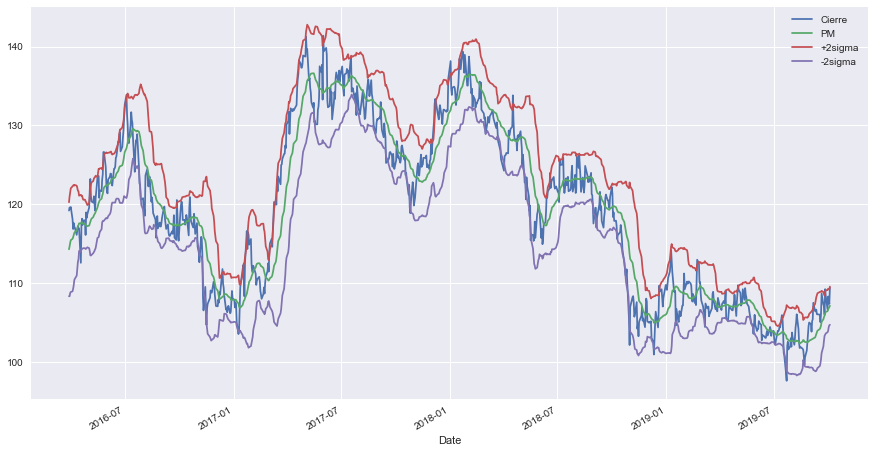

In [17]:
df[['Cierre', 'PM', '+2sigma', '-2sigma']].plot(figsize=(15,8));

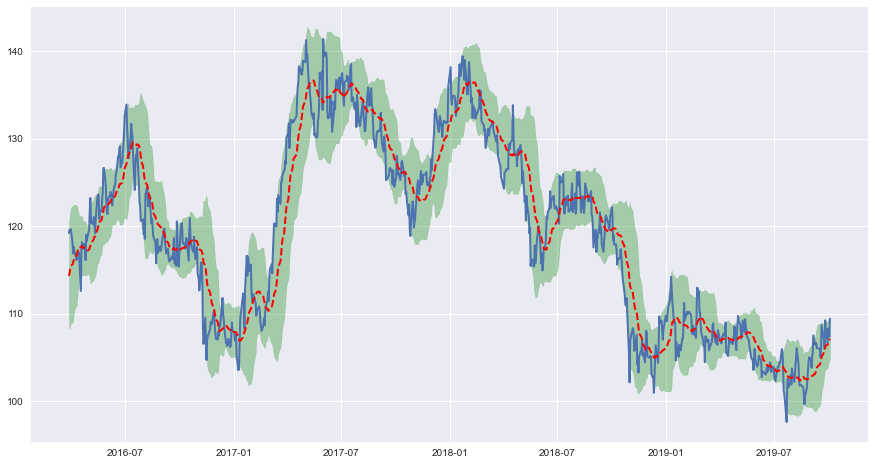

In [26]:
plt.figure(figsize = (15,8))

plt.plot(df['Cierre'].index, df['Cierre'], lw = 2, label = 'Precio de cierre')

plt.plot(df['PM'].index, df['PM'], lw = 2, ls = '--', color = 'red', label = f'Promedio Móvil {pm} dias')

plt.fill_between(df['Cierre'].index, df['-2sigma'], df['+2sigma'], color = 'green', alpha = .3);

### Calcular posición en el mercado

* LONG si PrecioCierre < $-2\sigma$
* SHORT si PrecioCierre > $+2\sigma$
* Y las posiciones adentro del canal (in between)

Pasos a seguir:
1. Crear columna poblada de "**_NaN_**"
1. Evaluar si el precio de cierre cruzo $+2\sigma$, y en su caso generar una señal **SHORT**
1. Evaluar si el precio de cierre cruzo $-2\sigma$, y en su caso generar una señal **LONG**
1. Cambiar todos los **NaN** a la señal inmediata anterior

#### 1. Crear columna poblada de "NaN"

In [27]:
df['Posicion'] = np.nan

In [29]:
df.tail()

,Apertura,Maximo,Minimo,Cierre,PM,+2sigma,-2sigma,Posicion
Date,,,,,,,,
2019-09-30,108.00,108.78,106.20,106.67,106.4435,109.114185,103.772815,NaN
2019-10-01,106.52,108.79,106.20,108.31,106.6195,109.295314,103.943686,NaN
2019-10-02,107.69,108.44,107.01,108.08,106.8315,109.238440,104.424560,NaN
2019-10-03,107.79,108.14,106.50,107.36,106.9405,109.226968,104.654032,NaN
2019-10-04,108.24,109.66,107.50,109.42,107.1410,109.561708,104.720292,NaN


#### 2. Evaluar si el precio de cierre cruzo $+2\sigma$, y en su caso generar una señal **SHORT**

In [30]:
df.loc[df['Cierre'] > df['+2sigma'], ['Posicion']]  = -1

In [31]:
df.head(50)

,Apertura,Maximo,Minimo,Cierre,PM,+2sigma,-2sigma,Posicion
Date,,,,,,,,
2016-03-29,117.83,119.99,117.31,119.20,114.2955,120.256254,108.334746,NaN
2016-03-30,119.21,119.99,119.15,119.59,114.6625,120.985793,108.339207,NaN
2016-03-31,119.59,121.40,119.15,119.43,115.1045,121.464915,108.744085,NaN
2016-04-01,119.45,121.00,118.27,119.65,115.4470,122.019117,108.874883,NaN
2016-04-04,119.65,119.87,117.31,118.11,115.6235,122.286552,108.960448,NaN
2016-04-05,118.00,118.00,116.61,116.86,115.8300,122.370336,109.289664,NaN
2016-04-06,116.86,119.83,116.86,117.62,116.1020,122.452929,109.751071,NaN
2016-04-07,117.52,117.79,115.50,117.17,116.3840,122.370562,110.397438,NaN
2016-04-08,117.27,118.00,116.69,116.99,116.5010,122.436115,110.565885,NaN


#### 3. Evaluar si el precio de cierre cruzo $-2\sigma$, y en su caso generar una señal **LONG**

In [32]:
df.loc[df['Cierre'] < df['-2sigma'], ['Posicion']] = 1
df.head(50)

,Apertura,Maximo,Minimo,Cierre,PM,+2sigma,-2sigma,Posicion
Date,,,,,,,,
2016-03-29,117.83,119.99,117.31,119.20,114.2955,120.256254,108.334746,NaN
2016-03-30,119.21,119.99,119.15,119.59,114.6625,120.985793,108.339207,NaN
2016-03-31,119.59,121.40,119.15,119.43,115.1045,121.464915,108.744085,NaN
2016-04-01,119.45,121.00,118.27,119.65,115.4470,122.019117,108.874883,NaN
2016-04-04,119.65,119.87,117.31,118.11,115.6235,122.286552,108.960448,NaN
2016-04-05,118.00,118.00,116.61,116.86,115.8300,122.370336,109.289664,NaN
2016-04-06,116.86,119.83,116.86,117.62,116.1020,122.452929,109.751071,NaN
2016-04-07,117.52,117.79,115.50,117.17,116.3840,122.370562,110.397438,NaN
2016-04-08,117.27,118.00,116.69,116.99,116.5010,122.436115,110.565885,NaN


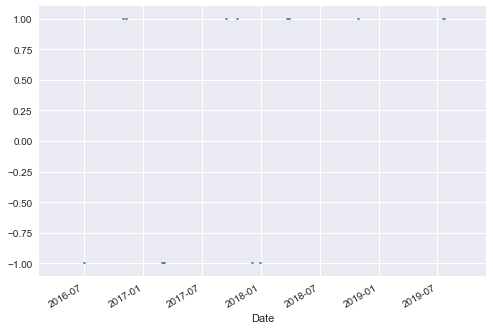

In [33]:
df['Posicion'].plot();

#### 4. Cambiar todos los **NaN** a la señal inmediata anterior

In [34]:
df.fillna(method = 'ffill', inplace = True)

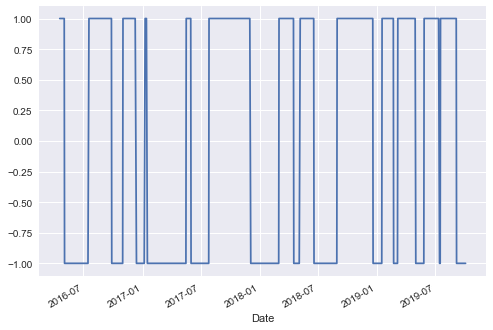

In [35]:
df['Posicion'].plot();

In [36]:
df.head()

,Apertura,Maximo,Minimo,Cierre,PM,+2sigma,-2sigma,Posicion
Date,,,,,,,,
2016-03-29,117.83,119.99,117.31,119.20,114.2955,120.256254,108.334746,NaN
2016-03-30,119.21,119.99,119.15,119.59,114.6625,120.985793,108.339207,NaN
2016-03-31,119.59,121.40,119.15,119.43,115.1045,121.464915,108.744085,NaN
2016-04-01,119.45,121.00,118.27,119.65,115.4470,122.019117,108.874883,NaN
2016-04-04,119.65,119.87,117.31,118.11,115.6235,122.286552,108.960448,NaN


### BackTesting

In [37]:
df = mf.retornos(df)

In [38]:
df.head()

,Apertura,Maximo,Minimo,Cierre,PM,+2sigma,-2sigma,Posicion,Retornos
Date,,,,,,,,,
2016-03-29,117.83,119.99,117.31,119.20,114.2955,120.256254,108.334746,NaN,NaN
2016-03-30,119.21,119.99,119.15,119.59,114.6625,120.985793,108.339207,NaN,0.003266
2016-03-31,119.59,121.40,119.15,119.43,115.1045,121.464915,108.744085,NaN,-0.001339
2016-04-01,119.45,121.00,118.27,119.65,115.4470,122.019117,108.874883,NaN,0.001840
2016-04-04,119.65,119.87,117.31,118.11,115.6235,122.286552,108.960448,NaN,-0.012954


In [39]:
df['Estrategia'] = df['Posicion'].shift(1) * df['Retornos']

In [40]:
df.dropna(inplace = True)

In [41]:
df[['Retornos', 'Estrategia']].sum()

Retornos     -0.028470
Estrategia    0.698821
dtype: float64

In [42]:
np.exp(df[['Retornos', 'Estrategia']].sum()) - 1

Retornos     -0.028069
Estrategia    1.011380
dtype: float64

In [43]:
df['Ret_Acum'] = np.exp(df['Retornos'].cumsum()) - 1
df['Estr_Acum'] = np.exp(df['Estrategia'].cumsum()) - 1

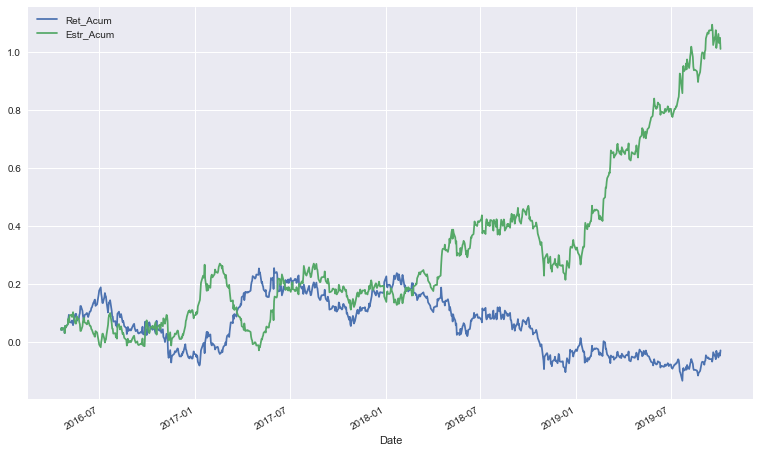

In [45]:
df[['Ret_Acum', 'Estr_Acum']].plot(figsize=(13,8));

In [ ]:
for accion in acciones:
    for ventana in lista_ventana:
        